### Consigna 1

# Demostración

Queremos demostrar que, si $(I - A)^{-1} = I + A + A^2 + \dots + A^n$, entonces:
$$
\lim_{n \to \infty} A^{n+1} = 0.
$$


Tomemos $$ S_N = I + A + A^2 + \dots + A^N $$
Luego $$ S_N(I - A) = (I + A + A^2 + \dots + A^N)(I-A)$$
$$S_N(I - A) = I - A + A - A^2 +   \dots - A^N + A^N - A^{N+1}$$
$$ S_N(I - A) = I - A^{N+1}$$

Ahora, si tomamos: $$N \to \infty$$ por enunciado sabemos que $$ S_N \to (I - A)^{-1} $$

Entonces:
$$\lim_{n \to \infty} S_N(I-A) = (I-A)^{-1} (I-A) = I $$

Y por lo tanto, dado que: $$ S_N(I - A) = I - A^{N+1}$$
$$\Rightarrow \lim_{n \to \infty} A^{N+1} = 0 $$


### Consigna 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [2]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

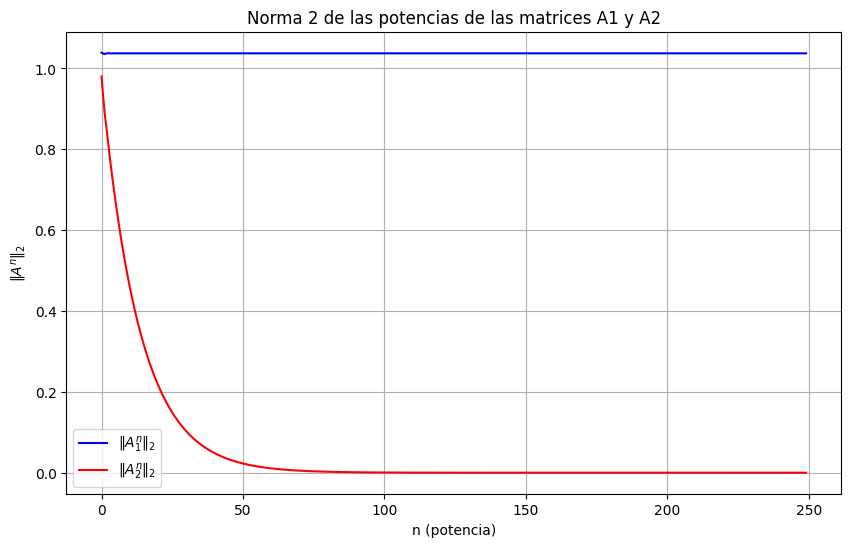

In [3]:

N = 250

a1 = []
a2 = []

A1_copia = A1.copy()
A2_copia = A2.copy()

for i in range(1, N+1):
    a1.append(norm(A1_copia, 2))
    a2.append(norm(A2_copia, 2))
    
    A1_copia = A1_copia @ A1
    A2_copia = A2_copia @ A2

plt.figure(figsize=(10, 6))
plt.plot(a1, label=r'$\|A_1^n\|_2$', color='blue')
plt.plot(a2, label=r'$\|A_2^n\|_2$', color='red')
plt.xlabel('n (potencia)')
plt.ylabel(r'$\|A^n\|_2$')
plt.title('Norma 2 de las potencias de las matrices A1 y A2')
plt.legend()
plt.grid(True)
plt.show()


### Consigna 3

In [ ]:
from funciones import metodoPotencia

estimaciones_A1 = [metodoPotencia(A1, 250) for _ in range(250)]
promedio_A1 = np.mean(estimaciones_A1)
desviacion_estandar_A1 = np.std(estimaciones_A1)

estimaciones_A2 = [metodoPotencia(A2, 250) for _ in range(250)]
promedio_A2 = np.mean(estimaciones_A2)
desviacion_estandar_A2 = np.std(estimaciones_A2)

print(f"Promedio del autovalor dominante para A1: {promedio_A1}")
print(f"Promedio del autovalor dominante para A2: {promedio_A2}")
print(f"Desviación estándar A1: {desviacion_estandar_A1}")
print(f"Desviación estándar A2: {desviacion_estandar_A2}")

Promedio del autovalor dominante para A1: 0.9999999919545608
Promedio del autovalor dominante para A2: 0.9276514499333158
Desviación estándar A1: 3.3900495293104636e-08
Desviación estándar A2: 1.0822362628615508e-07


In [6]:
import pandas as pd

data = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalores': [promedio_A1, promedio_A2],
    'Desviación Estándar': [desviacion_estandar_A1, desviacion_estandar_A2]
}

tabla = pd.DataFrame(data)

print(tabla)

  Matriz  Promedio Autovalores  Desviación Estándar
0     A1              1.000000         3.390050e-08
1     A2              0.927651         1.082236e-07


### Consigna 4

Grafiquemos la serie de potencias $ (I - A)^{-1} $ de  A1 y  A2 para $ n = 10 $ y  $ n = 100 $. Agregamos tambien un punto con $ n = 300 $ para ver mejor la tendencia de las normas





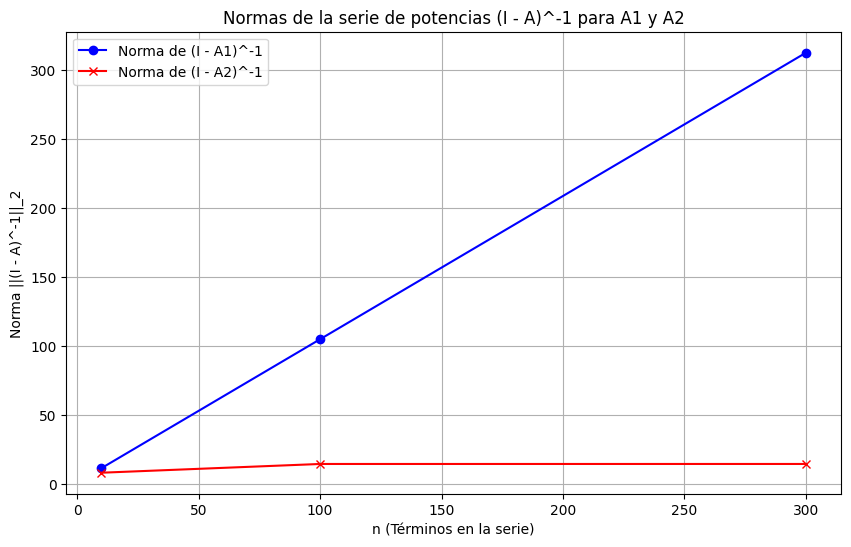

In [8]:
n_values = [10, 100 , 300]

norms_A1 = []
norms_A2 = []

for n in n_values:

    sum_A1 = np.eye(A1.shape[0])  
    sum_A2 = np.eye(A2.shape[0])  
    
    for k in range(1, n+1):
        sum_A1 += np.linalg.matrix_power(A1, k)
        sum_A2 += np.linalg.matrix_power(A2, k)
    
    norms_A1.append(norm(sum_A1, 2))
    norms_A2.append(norm(sum_A2, 2))


plt.figure(figsize=(10, 6))

plt.plot(n_values, norms_A1, label='Norma de (I - A1)^-1', marker='o', linestyle='-', color='b')
plt.plot(n_values, norms_A2, label='Norma de (I - A2)^-1', marker='x', linestyle='-', color='r')

plt.xlabel('n (Términos en la serie)')
plt.ylabel('Norma ||(I - A)^-1||_2')
plt.title('Normas de la serie de potencias (I - A)^-1 para A1 y A2')
plt.legend()
plt.grid(True)
plt.show()

Notemos que hay convergencia solo para la matriz A2. La serie de potencias converge si el radio espectral de la matriz A (es decir, el mayor valor absoluto entre todos sus autovalores) es menor que 1. Esto se debe a que, para matrices cuyo autovalor dominante (asociado al radio espectral) tiene un módulo menor que 1, las potencias sucesivas de la matriz tienden a 0, garantizando que la suma de la serie sea finita.
En este contexto, recordemos que el método de la potencia aproxima el autovalor dominante. Para nuestro ejemplo, el promedio estimado del autovalor dominante para A1 fue aproximadamente :
1.000000 lo que impide la convergencia, mientras que el promedio para A2 fue: 0.9276516098096924, permitiendo la convergencia de la serie.

Veamos ahora los errores

In [9]:
from funciones import calcularLU, inversaLU

def error(A, n):
    suma_parcial = np.eye(A.shape[0])
    errores = []

    for i in range(1, n):
        suma_parcial += np.linalg.matrix_power(A, i) 
        I = np.eye(A.shape[0])
        
        L, U, P = calcularLU(I - A)
        inv = inversaLU(L, U, P)
        
        norma = np.linalg.norm(suma_parcial - inv)
        errores.append(norma)  

    return errores

error_A1 = error(A1, 100)
error_A2 = error(A2, 100)
print( "error_A1:" , error_A1)
print("error_A2: " ,error_A2)


error_A1: [2.2529590757294156e+16, 2.2529590757294156e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.2529590757294164e+16, 2.2529590757294164e+16, 2.2529590757294164e+16, 2.2529590757294164e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.2529590757294172e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.252959075729418e+16, 2.252959075729418e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294188e+16, 2.2529590757294188e+16, 2.2529590757294188e+16, 2.252959075729419e+16, 2.252959075729419e+16, 2.252959075729419e+16, 2.252959075729419e+16, 2.2529590757294196e+16, 2.2529590757294196e+16, 2.2529590757294196e+16, 2.25295907572942e+16,

Notemos que el error en error_A1 se mantiene constante, sin embargo en error_A2 va decayendo mientras aumenta la sucecion de potencias.

Veamos un grafico:

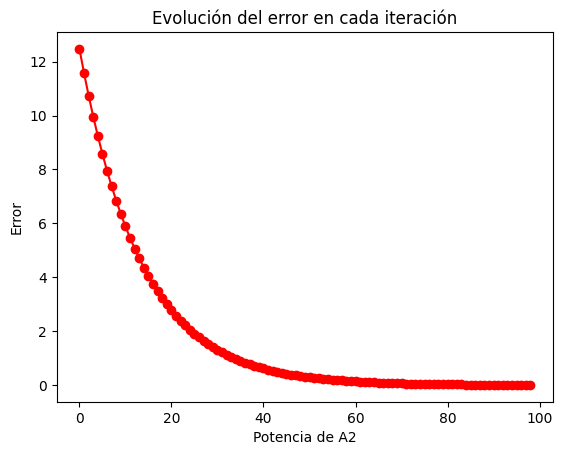

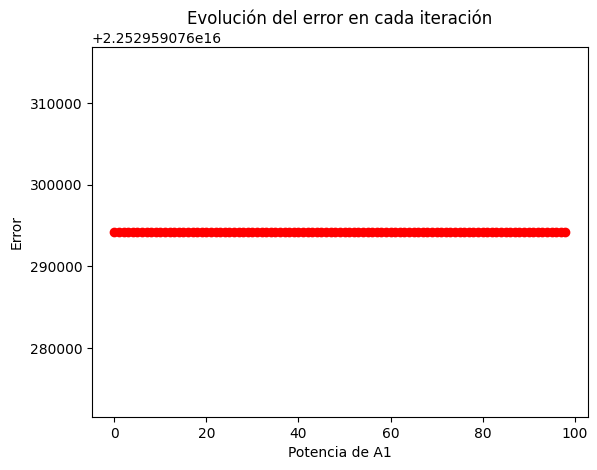

In [ ]:
x = range(len(error_A2))
    

plt.plot(x, error_A2, marker='o', linestyle='-', color='r', label='Error')
    

plt.xlabel('Potencia de A2')
plt.ylabel('Error')
plt.title('Evolución del error en cada iteración')

    
plt.show()

x = range(len(error_A1))
    

plt.plot(x, error_A1, marker='o', linestyle='-', color='r', label='Error')
    

plt.xlabel('Potencia de A1')
plt.ylabel('Error')
plt.title('Evolución del error en cada iteración')


plt.show()

Notamos que efectivamente el error_A2 decae mientras mas aumenta la sucesión de potencias. Es mas, este converge a cero, lo que nos dice que mientras a mayor sea la sucesión de potencias, $ (I-A)^{-1} $ converge a esta.

### Consigna 5

In [12]:
Appdata = pd.read_csv("Appdata.csv")
Anndata = pd.read_csv("Anndata.csv")
App = Appdata.values
Ann = Anndata.values

In [13]:
import numpy as np
from funciones import metodoPotencia

avalAnn = metodoPotencia(Ann,50)
avalApp = metodoPotencia(App,50)

print ("El autovalor estimado para Ann es: " + str(avalAnn))
print ("El autovalor estimado para App es: " + str(avalApp))

El autovalor estimado para Ann es: 0.2606962777847238
El autovalor estimado para App es: 0.3847350972359611


Como podemos ver la estimacion de los autovalores para Ann y App luego de ser aplicado el metodo de la potencia son ambos menores a 1. Por lo tanto, por lo argumentado en la consigna 4 (c), existe convergencia de la suma de potencias para ambas matrices.

### Consigna 6

a) Vamos a probar que para cualquier vector $z \in \mathbb{R}^n$ sucede que el promedio de las componentes de $E_nz$ es 0. 

Sabiendo que $E_n \in \mathbb{R}^{n \times n}$ se escribe como $ E_n = I_n - \frac{1}{n}ee^t $  podemos decir que:
$$ E_nz = (I_n - \frac{1}{n}ee^t)z = z - \frac{1}{n}ee^tz \quad ,luego\,\, usando\, \, e = \begin{pmatrix} 1 \\\vdots \\ 1 \end{pmatrix}  \,\, puedo \,\,escribir\,\, que\,\, e^tz= \sum_{i=1}^{n} z_i$$
$$ reemplazando\,\, obtenemos\,\, E_nz = z -\frac{1}{n}\left( \sum_{i=1}^{n} z_i \right) e$$
$$ Queremos \,\,analizar \,\,el\,\, promedio\,\, de\,\, las\,\, componentes\,\, de \,\,E_nz\,\,, este \,\, promedio \,\,se \,\, calcula \,\, como\,\, \frac{1}{n} \sum_{i=1 }^{n}(E_nz)_i , \, \, y \,\,por\,\, definicion\,\, de\,\, E_nz ,\,\,  \\
sabemos\,\, que \,\,: (E_nz)_i = z_i -\frac{1}{n}\left( \sum_{j=1}^{n} z_j \right) luego: $$

$$ \frac{1}{n} \sum_{i=1 }^{n}(E_nz)_i = \frac{1}{n} \sum_{i=1}^{n} \left( z_i - \frac{1}{n} \sum_{j=1}^{n} z_j \right) = \frac{1}{n} \sum_{i=1}^{n} z_i - \frac{1}{n} \sum_{i=1}^{n}\frac{1}{n}\sum_{j=1}^{n} z_j $$
$$ el \,\,segundo \,\, termino\,\, es : \,\,  \frac{1}{n} * \frac{1}{n} * \sum_{i=1}^{n} 1 * \sum_{j=1}^{n} z_j = \frac{1}{n} \sum_{j=1}^{n} z_j $$

$$ por\,\, lo\,\, que,\,\, finalizando \,\,tenemos :\,\, \\  

\frac{1}{n} \sum_{i=1 }^{n}(E_nz)_i = \frac{1}{n} \sum_{i=1}^{n} z_i-\frac{1}{n} \sum_{j=1}^{n} z_j = 0$$
b) Para este ejercicio primero buscamos expresar la matriz de la transformacion lineal $E_n$ en la base $ \{e,d_2,..., d_n\}$ luego podremos calcular los autovalores, autovectores y determinar la imagen y nucleo de dicha matriz.
$$ \bullet caso \,\, E_ne $$
$$\quad E_ne =\left(I_n - \frac{1}{n}ee^t \right)e = e - \frac{1}{n}e\left(e^te\right) = e - \frac{1}{n}en = 0$$
$$E_n = 0 \,\,podemos \,\,interpretarlo\,\, como \,\, Av = \lambda  \,\, con \,\,v = e\,\, y \,\, \lambda = 0 $$
$$\bullet caso \,\, E_nd $$
$$ Sabemos\,\, que\,\, d \in \{d_2,...,d_n \}\,\, y \,\,como\,\, estos\,\, vectores\,\, son\,\, ortogonales \,\,a\,\, e\,\, luego\,\, e^td_i =0$$
$$ E_nd= \left(I_n - \frac{1}{n}ee^t \right)d = d - \frac{1}{n}e\left(e^td\right)= d$$
$$ Entonces \,\,E_nd = 1d \quad \Rightarrow \quad d \,\,es \,\,autovector\,\, de\,\, \lambda = 1$$
Ahora para encontrar el nucleo y la imagen de esta matriz es cuestion de poner los transformados de los elementos de la base $b=\{ d_2,...d_n\}$ como columnas

$$ E_n = Abb =
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix} $$
Con esta matriz obtenemos los subespacios buscados:
$$ \bullet  Nucleo: el \,\,unico \,\,vector\,\, que\,\, manda \,\,otros\,\, al \,\, 0 \,\, es \,\,e\,\,$$
$$ Vemos \,\ que \,\ Nu\left( E_n \right) = \langle e \rangle \,\ luego \,\ dim \left( Nu\left(E_n\right) \right) = 1$$
$$ \bullet Im \left( E_n\right) = \langle d_2, ... ,d_n \rangle \,\, entonces\,\,  dim \left( Im\left(E_n\right) \right) = n - 1  $$

c) Sabemos que un proyector se dice ortogonal si y solo si $Nu\left(A \right) \bot Im\left( A \right)  \\ $

Anteriormente  pudimos observar que es cierto que $ \langle d_2, ... , d_n\rangle $ es ortogonal a  $\langle e\rangle$, sabemos que $Im\left( A \right) = \langle d_2, ... , d_n\rangle$ y $Nu\left(A \right) = \langle e \rangle   $ luego $Nu\left(A \right) \bot Im\left( A \right)  \\ $

Dicho proyector proyecta sobre el subespacio generado por $ \langle d_2, ... , d_n\rangle $

d)

$ \bullet $ Es FALSO que  E_n es una matriz  ortogonal: quiero   ver  que  $E_n^tE_n = I \,\,luego $
$$ \left( I_n - \frac{1}{n}ee^t \right)^t \left( I_n -\frac{1}{n}ee^t \right) = \left( I_n- \frac{1}{n}e^te \right) \left( I_n- \frac{1}{n}ee^t\right) = I_n -\frac{2}{n}e^te + \frac{1}{n^2}nee^t = I_n - \frac{1}{n}ee^t \neq I$$

$ \bullet $  Es VERDADERO que $E_n$ es una matriz singular pues tiene columnas de ceros y tambien sabemos que $det\left( E_n\right) = det \left( 0d_2...d_n \right) = 0 $

$ \bullet $ Es FALSO que $E_n$ es definida positiva pues dicha matriz no es inversible ya que $det\left( E_n\right) = 0 $

$ \bullet $ Es VERDADERO que $tr\left(E_n\right) = n - 1:$

$$sabemos\,\,  que \,\,  E_n =  
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix} \quad \Rightarrow tr\left(E_n\right) = n-1 $$
</p>



### Consigna 7

In [ ]:
from funciones import metodoPotenciaRecursivo

#Armamos nuestra matriz de covarianzas C del paıs Peru

In = np.eye(40)
e = np.ones((40, 1))
eeT = np.outer(e, e)
En = In - (1 / 40) * eeT

AppC = En@App
C = (np.transpose(AppC)@AppC)/(40 - 1)

autovalores, autovectores = metodoPotenciaRecursivo(C, k=2)
for i in range(len(autovalores)):
    print(f"Autovector {i+1}: {autovectores[i].flatten()}")
    print(f"Autovalor {i+1}: {autovalores[i]}")

Autovector 1: [0.28520896 0.00491416 0.12166537 0.10734226 0.17502069 0.097227
 0.20693452 0.04309433 0.28223174 0.1384179  0.13303172 0.08135873
 0.09405806 0.11929404 0.13162791 0.0168839  0.15923335 0.28106319
 0.13983088 0.04567087 0.03024517 0.27774329 0.15262132 0.06782533
 0.107105   0.10556787 0.17316653 0.00664866 0.14563964 0.1419238
 0.30932955 0.25533874 0.22124692 0.17201073 0.15538725 0.12408455
 0.0865357  0.13170692 0.11431347 0.03028353]
Autovalor 1: 0.005816416752360748
Autovector 2: [4.27337051e-02 1.50589995e-01 1.75223699e-01 1.99499580e-01
 2.89260354e-01 6.74696228e-02 2.87660424e-01 2.46993175e-01
 2.68802622e-01 1.12258992e-01 1.93529641e-01 7.83414276e-02
 1.63194037e-01 1.98688385e-01 3.46356751e-02 1.48644832e-01
 2.06807194e-02 2.19469505e-01 3.81621242e-02 9.01462298e-02
 1.77715971e-01 2.26558259e-01 9.32981943e-02 1.81950295e-01
 7.90963980e-05 1.02275272e-01 4.25284658e-02 9.77084467e-02
 2.43246270e-02 2.90097313e-02 1.21582202e-01 2.86423199e-02
 1.69

### Consigna 8

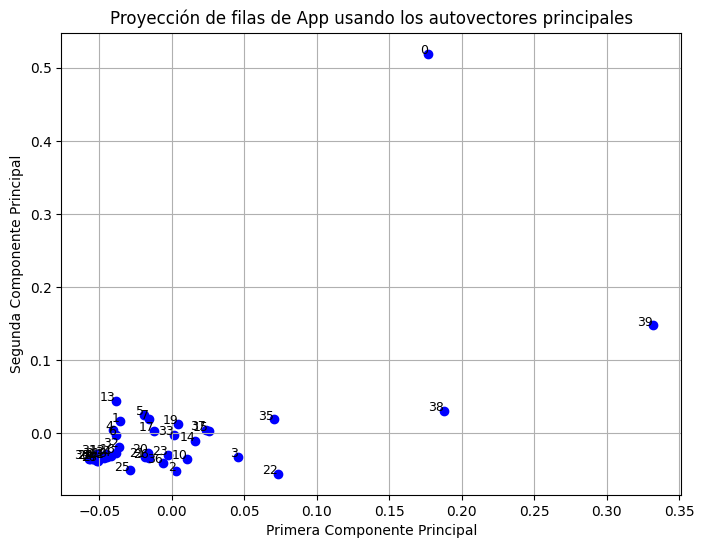

In [ ]:
from funciones import GraficoProyeccion
## PAIS 1: PERU

subespacio = np.array(autovectores).T
proyeccion = AppC @ np.array(autovectores).T
GraficoProyeccion(proyeccion,"App","blue")


Visualmente podriamos identificar 2 clusters: uno que contenga los puntos como el 5, 3, 21, 10, 22 y otro que contenga las proyecciones mas alejadas como el punto 38 y 39. Para entender por que dichas proyecciones estan mas alejadas de las otras se podria ver para cada sector numerado (cada punto etiquetado coincide con su numero de fila en la matriz de covarianzas) que ocurre con la produccion final y ver por que el algoritmo PCA me agrupa los puntos de esa manera.

### Consigna 9 -

Para una matriz cuadrada A cuyo mayor autovalor asociado tiene valor absoluto menor que 1, se cumple que:
$$ (I −A)^{−1} = I + A + A^2 + A^3 + ... + A^n+ ... $$
Como vimos anteriormente, esta condicion siempre se cumple en las matrices $ A $ de insumo-producto. Para estas matrices, la sucesion suma de potencias representa:

- $ A^1 $ La matriz insumo-producto sin modificaciones: Los insumos usados directamente para producir otros

- $ A^2 $ El insumo necesario para producir los insumos que se usan en el item anterior, O sea, los insumos indirectos de orden 2

- $ A^n $ Insumos indirectos de orden $ n $, o sea, los necesarios luego de $ n $ etapas en la cadena de producción

Podemos usar la ecuacion para reemplazarla en la definicion de la matriz input-output integrada verticalmente $ H $
$$ H = A (I − A)^{−1} $$
$$ H = A (I + A + A^2 + A^3 + ... + A^n+ ...) $$
$$ H = A + A^2 + A^3 + ... + A^n+ ... $$

Comparemosla con la matriz de Leontief $ L = (I −A)^{−1} $. Se puede reemplazar directamente la ecuacion tal que:
$$ L (I + A + A^2 + A^3 + ... + A^n+ ...) $$

Notamos que tanto $ L $ como $ H $ suman las sucesivas dependencias $ A^n $, pero en la Matriz integrada $ H $ no se le suma la identidad $ I $.

Esto señala que a $ H $ le falta una unidad de producción inicial, que en $ L $ se satisface directamente antes de las iteraciones adicionales de insumos.

Por eso representa unicamente la acumulacion de los efectos indirectos, y por eso se refuerzan las relaciones entre los sectores que tienen una alta relevancia en A

### Consigna 10 -

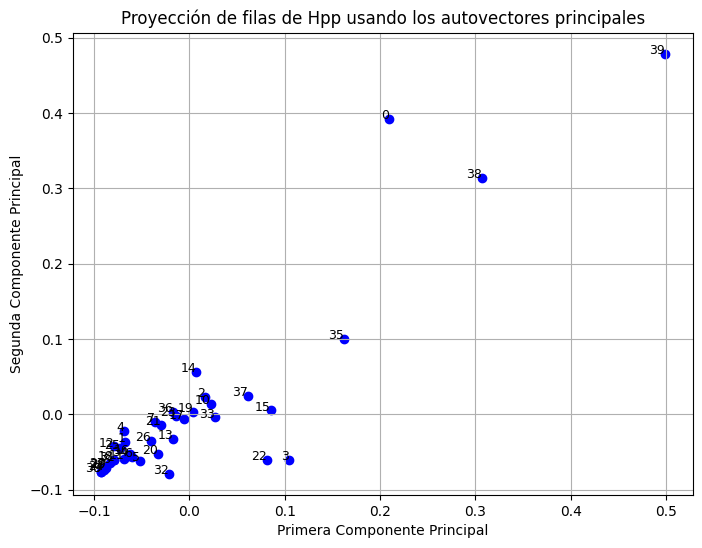

In [ ]:
from funciones import calcularLU, inversaLU, metodoPotenciaRecursivo
import pandas as pd
import numpy as np

# Calculo Leontief de Peru
Ipp = np.eye(App.shape[0])
Lpp, Upp, Ppp = calcularLU(Ipp - App)  # LU de Leontief Perú
LeontiefInvpp = inversaLU(Lpp, Upp, Ppp)

# Calculo input-output integrada verticalmente H
Hpp = App@LeontiefInvpp

# Calculo matriz de covarianza, ahora para H
HppC = En@Hpp
C = (np.transpose(HppC)@HppC)/(40 - 1)
autovalores, autovectores = metodoPotenciaRecursivo(C, k=2)
subespacio = np.array(autovectores).T
proyeccion = HppC @ np.array(autovectores).T

GraficoProyeccion(proyeccion,"Hpp","blue")

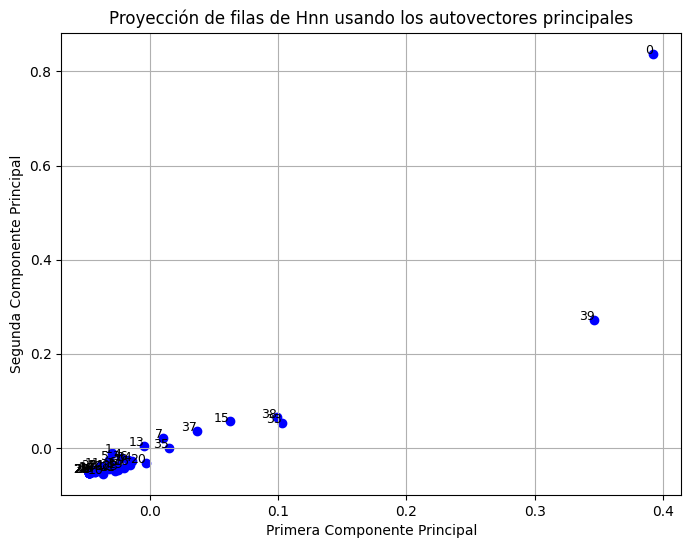

In [ ]:
# Repetimos el procedimiento para Nicaragua

# Calculo Leontief de Nicaragua
Inn = np.eye(Ann.shape[0])
Lnn, Unn, Pnn = calcularLU(Inn - Ann)  # LU de Leontief Perú
LeontiefInvnn = inversaLU(Lnn, Unn, Pnn)

# Calculo input-output integrada verticalmente H
Hnn = Ann@LeontiefInvnn

# Calculo matriz de covarianza, ahora para H
HnnC = En@Hnn
C2 = (np.transpose(HnnC)@HnnC)/(40 - 1)
autovalores, autovectores = metodoPotenciaRecursivo(C2, k=2)
subespacio = np.array(autovectores).T
proyeccionNN = HnnC @ np.array(autovectores).T

GraficoProyeccion(proyeccionNN,"Hnn","blue")

Nos enfocamos en la de Perú, que fue con la que nos quedamos en la consigna anterior. Observamos que los puntos que aportaban mucho a un solo autovalor, ahora aportan a ambos y la proyeccion queda un grafico casi lineal. Al considerar las potencias de $ A $ (y su acumulación en $ H $), las interacciones entre sectores se vuelven más equilibradas y menos concentradas en pocos sectores o pocos autovalores.

### Consigna 11 -

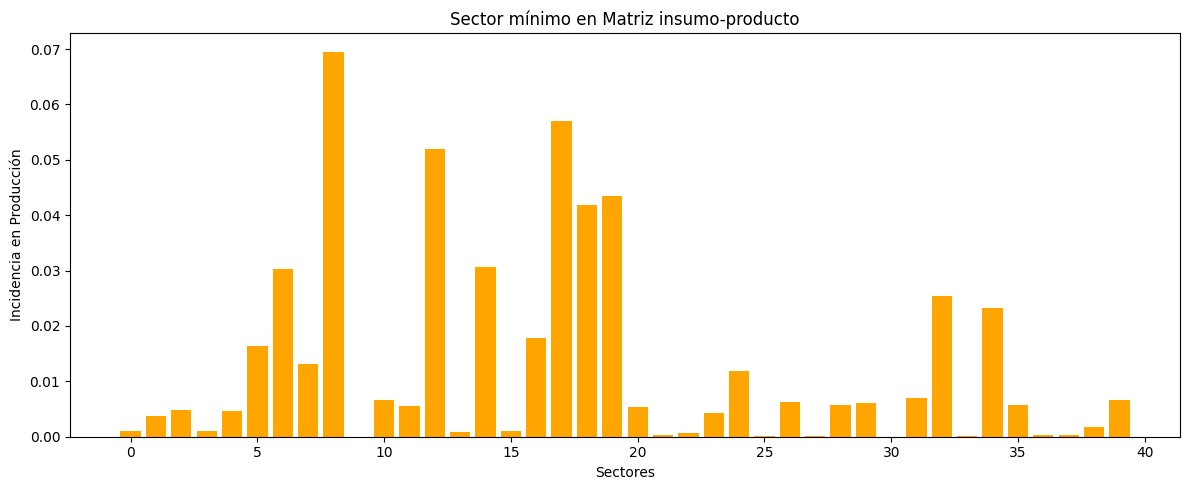

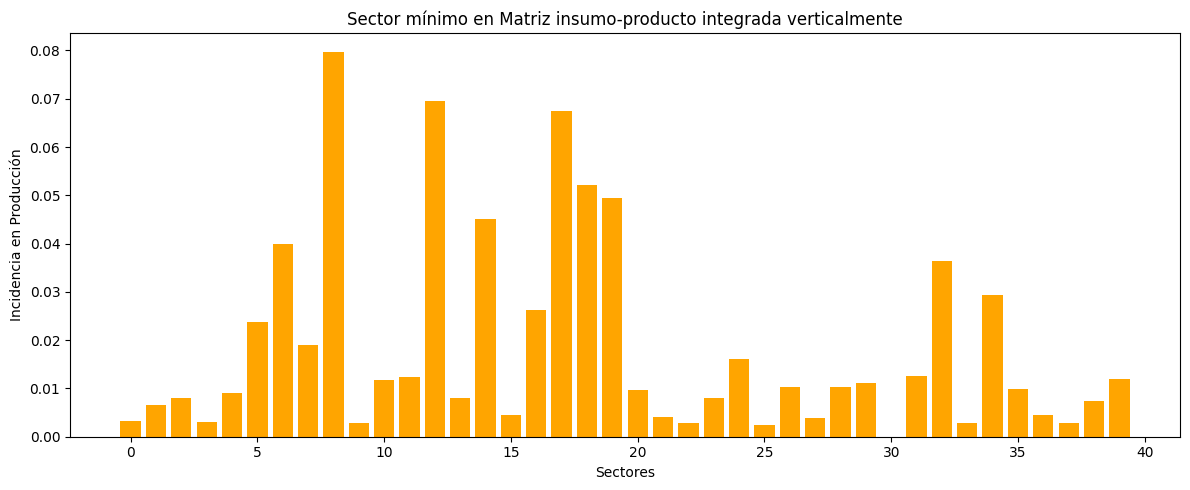

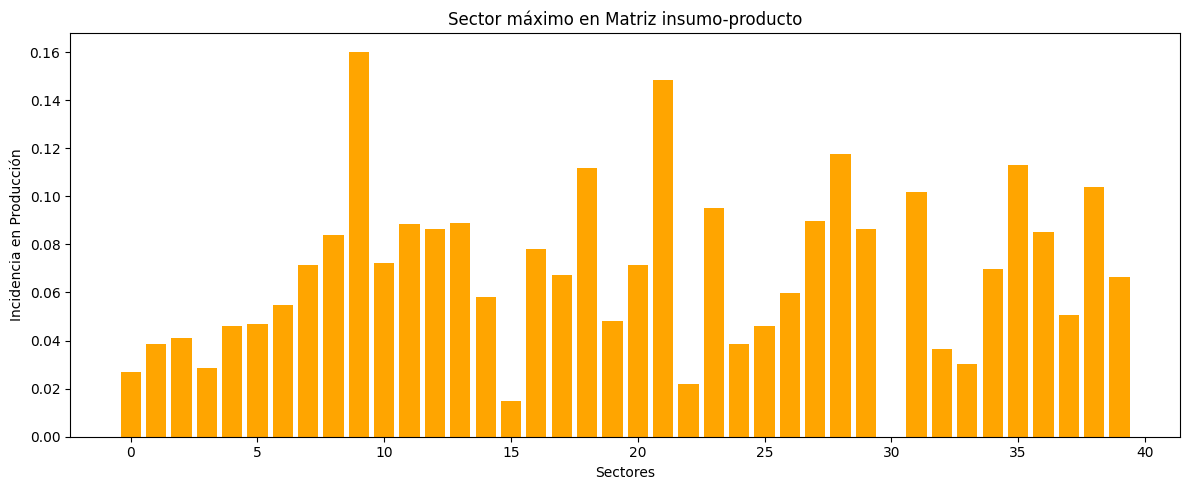

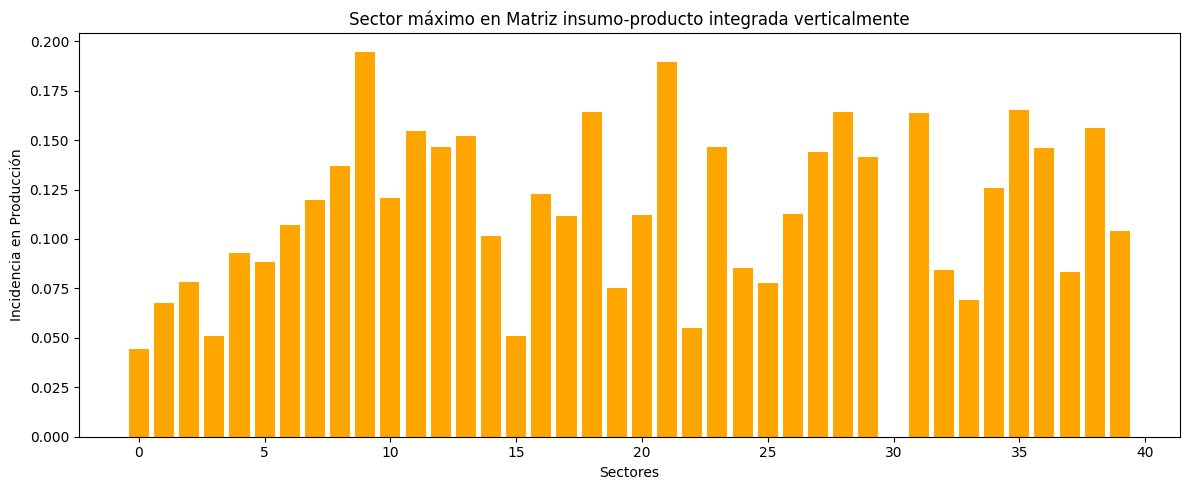

In [ ]:
from funciones import GraficarFilas
Appdata = pd.read_csv("Appdata.csv")
Anndata = pd.read_csv("Anndata.csv")
App = Appdata.values
Ann = Anndata.values

# Distancia al Origen de coordenadas con la Norma de la Proyeccion
normas_proyeccion = np.zeros(proyeccion.shape[0])
for i in range(proyeccion.shape[0]):
    normas_proyeccion[i] = np.linalg.norm(proyeccion[i])

# Calculo minima y maxima distancia
MinNormaProyeccion = np.inf
MaxNormaProyeccion = 0
for i in range(proyeccion.shape[0]):
    if normas_proyeccion[i] < MinNormaProyeccion:
        MinNormaProyeccion = normas_proyeccion[i]
        IndiceDelMin = i
    if normas_proyeccion[i] > MaxNormaProyeccion:
        MaxNormaProyeccion = normas_proyeccion[i]
        IndiceDelMax = i

# Vemos las filas del minimo (mas cercano al centro en la proyeccion) y del maximo (el mas alejado)
TituloAppMin="Sector mínimo en Matriz insumo-producto"
TituloHppMin="Sector mínimo en Matriz insumo-producto integrada verticalmente"
TituloAppMax="Sector máximo en Matriz insumo-producto"
TituloHppMax="Sector máximo en Matriz insumo-producto integrada verticalmente"
GraficarFilas(App,IndiceDelMin,TituloAppMin)
GraficarFilas(Hpp,IndiceDelMin,TituloHppMin)
GraficarFilas(App,IndiceDelMax,TituloAppMax)
GraficarFilas(Hpp,IndiceDelMax,TituloHppMax)

Como vimos en la consigna 9, La Matriz $ A $ insumo-producto representa los insumos directos que un sector específico necesita de otros sectores para producir una unidad de su output. La Matriz integrada verticalmente $ H $ le suma todos los insumos indirectos acumulados.

A parte de que los valores necesariamente son mayores en $ H $, notamos que hay una menor diferencia entre una misma fila de $ H $ que en una misma fila de $ A $. Esto señalaria que en cada iteración de insumos (potencias de $ A $ que, como vimos anteriormente, estan incluidas en $ H $). Nuevamente, los valores de cada columna se "mezclan" o difunden debido a las interdependencias entre sectores que señalamos en la proyeccion de la cosigna anterior

En cuanto a la comparación entre las filas, notamos que el gráfico del sector mínimo tiene varios picos, lo que indicaría que necesita insumos de otros sectores puntuales. En cambio, el sector máximo necesita insumos de toda la cadena de producción.